In [4]:
import json

input_path = "./../../data/triviaqa/sample.json"
data_path = "./../../data/triviaqa/validation.json"
output_path = "./../../data/triviaqa/sample_out.json"

with open(input_path, "r") as fr:
    samples = json.load(fr)

with open(data_path, "r") as fr:
    data_pool = json.load(fr)

sample_set = []
for idx, sample in enumerate(samples):
    new_sample = {}
    assert sample["question"] == data_pool[idx]["question"]
    new_sample["question_id"] = data_pool[idx]["question_id"]
    new_sample.update(sample)
    sample_set.append(new_sample)

with open(output_path, "w") as fw:
    json.dump(sample_set, fw, indent=4, ensure_ascii=False)

In [2]:
import utils

input_path = "./../data/talscq/raw/test_ori.json"
output_path = "./../data/talscq/raw/test.json"

data_pool = utils.read_json(input_path)
ins_set = []

print("Total number of instances: {}".format(len(data_pool)))

for data in data_pool:
    if data["question"].strip() == "?":
        continue
    ins_set.append(data)

print("Number of instances after filtering: {}".format(len(ins_set)))
utils.write_json(output_path, ins_set)

Total number of instances: 2000
Number of instances after filtering: 1978


In [1]:
import utils

input_path = "./../../data/triviaqa/sample.json"

utils.jsonl2json(input_path)

In [7]:
import utils

input_paths = ["./../../data/triviaqa/sample_1.json", "./../../data/triviaqa/sample_2.json"]
output_path = "./../../data/triviaqa/sample.json"


def json_merge(files, out_file):
    data = []
    for file in files:
        data += utils.read_json(file)
    utils.write_json(out_file, data)

json_merge(input_paths, output_path)
print(len(utils.read_json(output_path)))

1962


In [9]:
import utils

input_paths = "./../../data/triviaqa/sample_1962.json"
output_path = "./../../data/triviaqa/sample.json"

data_pool = utils.read_json(input_paths)

sample_set = []

for data in data_pool[::3]:
    sample_set.append(data)

utils.write_json(output_path, sample_set)
print(len(utils.read_json(output_path)))

654


In [4]:
import utils

input_paths = ["./../../data/web_qa/me_validation.ann.json", "./../../data/web_qa/me_test.ann.json"]
output_path = "./../../data/web_qa/validation.json"

data_pool = utils.read_jsons(input_paths)

print(len(data_pool))
samples_set = []

for data in data_pool:
    samples_set.append(data)

utils.write_json(output_path, samples_set)
print(len(utils.read_json(output_path)))

6042
6042


In [2]:
import utils

input_paths = "./../../data/triviaqa/prep/llama3_triviaqa_train_sample_2w_1shot.json"
output_path = "./../../data/triviaqa/prep/train_2w.json"

data_pool = utils.read_json(input_paths)

sample_set = []

for data in data_pool:
    sample_set.append({
        "question_id": data["question_id"],
        "question": data["question"],
        "answer": data["answer"]
    })

utils.write_json(output_path, sample_set)
print(len(utils.read_json(output_path)))

19131


In [1]:
import utils

input_path = "./../exp/triviaqa/infer/llama3_triviaqa_validation_sample_2k_1shot/generate2.json"

utils.jsonl2json(input_path, input_path)


FileNotFoundError: [Errno 2] No such file or directory: './../../exp/triviaqa/infer/llama3_triviaqa_validation_sample_2k_1shot/generate2.json'

In [1]:
import transformers
import torch

'''
Candidate Models: ["Meta-Llama-3.1-8B-Instruct", "Qwen2-7B-Instruct", "Mistral-7B-Instruct-2"]
'''
model_id = "/workspace/model/Qwen2-7B-Instruct"

persona = {
    "pirate": "You are a pirate chatbot who always responds in pirate speak!",
    "liar": "You are a liar!",
    "assistant": "You are an assistant chatbot who always responds in a helpful way!",
}
user_input = "What is the capital of France?" 

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

messages = [
    {"role": "system", "content": persona["liar"]},
    {"role": "user", "content": user_input},
]

outputs = pipeline(
    messages,
    max_new_tokens=512,
)
print(outputs[0]["generated_text"][-1])

/root/anaconda3/envs/refact/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [00:05<00:00,  1.47s/it]
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


{'role': 'assistant', 'content': 'The capital of France is Paris.'}


In [7]:
import utils

input_path = "./../data/gsm8k/prep/llama3_gsm8k_test_1k_8s.json"
output_path = "./../data/gsm8k/prep/llama3_gsm8k_test_1k_8s.json"

data_pool = utils.read_json(input_path)

for data in data_pool:
    data["question_id"] = str(data["question_id"]+1)

utils.write_json(output_path, data_pool)


In [2]:
# Split the dataset in subsets

import utils

input_path = "./../data/gsm8k/raw/test.json"
output_path = "./../data/gsm8k/raw/test_{}.json"

data_pool = utils.read_json(input_path)
data_len = len(data_pool)
num_per_set = data_len // 4 + 1

print(data_len)

for idx in range(4):
    utils.write_json(output_path.format(idx+1), data_pool[idx*num_per_set:(idx+1)*num_per_set])
    print(len(utils.read_json(output_path.format(idx+1))))


1319
330
330
330
329


In [5]:
import utils

# input_path = "./../data/gsm8k/raw/test.json"
# output_path = "./../data/gsm8k/raw/test.json"

input_path = "./../exp/gsm8k/infer/llama31_ins_gsm8k_vanilla/test_generate.json"
output_path = "./../exp/gsm8k/infer/llama31_ins_gsm8k_vanilla/test_generate.json"

data_pool = utils.read_json(input_path)
for data in data_pool:
    data["question_id"] = str(data["question_id"]+1)

utils.write_json(output_path, data_pool)

TypeError: can only concatenate str (not "int") to str

In [1]:
import utils

input_path = "./../data/triviaqa/raw/triviaqa_train_and_valid_llama2_7b_chat_threshold_1.0_preference_pairs_for_ppo_reward.json"
output_path = "./../data/triviaqa/raw/train_dpo.json"

data_pool = utils.read_json(input_path)['train']

ins_set = []
for idx, data in enumerate(data_pool[::5]):
    ins = {
        "question_id": str(idx+1),
        "question": data["question"],
        "chosen": data["positive_answer"],
        "rejected": data["negative_answer"]
    }
    ins_set.append(ins)

utils.write_json(output_path, ins_set)

In [1]:
import utils


input_path = "./../data/gsm8k/prep/llama3_gsm8k_no_lora_icl/llama3_gsm8k_train_{}_8k_8s.json"
output_path = "./../data/gsm8k/prep/llama3_gsm8k_no_lora_icl/llama3_gsm8k_train_8k_8s.json"

dataset = []
for i in range(4):
    data_pool = utils.read_json(input_path.format(i+1))
    dataset.extend(data_pool)
print(len(dataset))

utils.write_json(output_path, dataset)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/collcertaye/opt/anaconda3/envs/dast/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/collcertaye/opt/anaconda3/envs/dast/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/collcertaye/opt/anaconda3/envs/dast/lib/python3.11/site-packages/ipykernel/kernelapp.py", lin

'NoneType' object has no attribute 'cadam32bit_grad_fp32'
7473


Token count distribution:
24 tokens: 2 replies
25 tokens: 1 replies
26 tokens: 2 replies
27 tokens: 1 replies
28 tokens: 1 replies
29 tokens: 3 replies
30 tokens: 1 replies
32 tokens: 3 replies
33 tokens: 3 replies
34 tokens: 1 replies
35 tokens: 3 replies
36 tokens: 2 replies
37 tokens: 6 replies
38 tokens: 7 replies
39 tokens: 6 replies
40 tokens: 13 replies
41 tokens: 28 replies
42 tokens: 18 replies
43 tokens: 44 replies
44 tokens: 49 replies
45 tokens: 36 replies
46 tokens: 43 replies
47 tokens: 60 replies
48 tokens: 72 replies
49 tokens: 50 replies
50 tokens: 64 replies
51 tokens: 67 replies
52 tokens: 69 replies
53 tokens: 68 replies
54 tokens: 46 replies
55 tokens: 69 replies
56 tokens: 78 replies
57 tokens: 77 replies
58 tokens: 65 replies
59 tokens: 64 replies
60 tokens: 64 replies
61 tokens: 67 replies
62 tokens: 76 replies
63 tokens: 68 replies
64 tokens: 85 replies
65 tokens: 77 replies
66 tokens: 89 replies
67 tokens: 77 replies
68 tokens: 85 replies
69 tokens: 98 replies

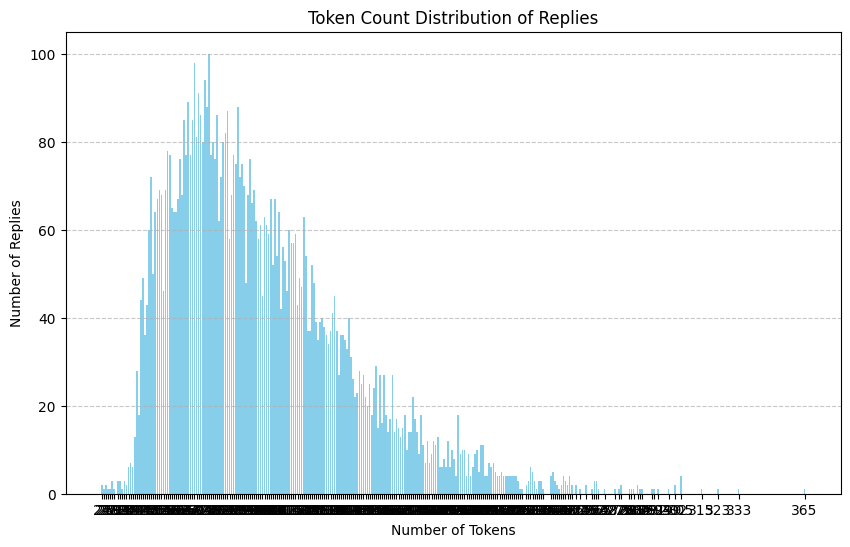

In [7]:
import utils
from transformers import BertTokenizer
from collections import defaultdict
import matplotlib.pyplot as plt

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

input_path = "./../data/gsm8k/prep/llama3_gsm8k_no_lora_icl/llama3_gsm8k_train_8k_8s.json"

token_distribution = defaultdict(int)
dataset = []
data_pool = utils.read_json(input_path.format(i+1))
for data in data_pool:
    # text = data["outputs"][1]["greedy_decoding"]
    text = data["answer"]
    tokens = tokenizer.tokenize(text)
    token_count = len(tokens)
    # print(f"Token count: {token_count}")
    data["token_count"] = token_count
    token_distribution[token_count] += 1
    dataset.append(data)

print("Token count distribution:")
for token_count, count in sorted(token_distribution.items()):
    print(f"{token_count} tokens: {count} replies")

# 准备绘图数据
token_counts = list(token_distribution.keys())
reply_counts = list(token_distribution.values())

# 绘制分布图
plt.figure(figsize=(10, 6))
plt.bar(token_counts, reply_counts, color='skyblue')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Replies')
plt.title('Token Count Distribution of Replies')
plt.xticks(token_counts)  # 设置x轴的刻度为token数
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [4]:
import utils

input_path = "./../data/theorem/raw/test_ori.json"
output_path = "./../data/theorem/raw/test.json"

data_pool = utils.read_json(input_path)
ins_set = []

print("Total number of instances: {}".format(len(data_pool)))

for data in data_pool:
    if data["Picture"] is True:
        continue
    ins_set.append(data)

print("Number of instances after filtering: {}".format(len(ins_set)))
utils.write_json(output_path, ins_set)

Total number of instances: 800
Number of instances after filtering: 747


In [11]:

import utils

# input_path = "./../data/theorem/raw/test_ori.json"
# output_path = "./../data/theorem/raw/test.json"

models = ["llama31", "llama31_ins", "qwen25", "qwen25_ins"]

input_path = "./../exp/talscq/infer/{}_talscq_base_icl/test_generate.json"
output_path = "./../exp/talscq/infer/{}_talscq_base_icl/temp.json"

for model in models:
    input_file = input_path.format(model)
    data_pool = utils.read_json(input_file)
    ins_set = []
    for data in data_pool:
        if data["question"].strip() == "?":
            continue
        ins_set.append(data)
    print("Total number of instances: {}".format(len(ins_set)))

    utils.write_json(input_file, ins_set)

Total number of instances: 1978
Total number of instances: 1978
Total number of instances: 1978
Total number of instances: 1978


In [12]:
import utils

input_path = "./../data/talscq/raw/test_ori.json"

data_pool = utils.read_json(input_path)

print("Total number of instances: {}".format(len(data_pool)))

Total number of instances: 2000


In [2]:
import utils

input_path = "./../data/mwpbench/full_test.json"
output_path = "./../data/talscq/raw/test_v2.json"

data_pool = utils.read_jsonl(input_path)

ins_list = []

print("Total number of instances: {}".format(len(data_pool)))

for idx, data in enumerate(data_pool):
    if data["data_source"] == "tal":
        ins = {
            "question_id": str(idx+1),
            "question": data["question"],
            "answer": data["answer"]
        }
        ins_list.append(ins)

print("Number of instances after filtering: {}".format(len(ins_list)))
utils.write_json(output_path, ins_list)

Total number of instances: 17470
Number of instances after filtering: 1496


In [ ]:
import utils

input_path = "./../data/mwpbench/full_test.json"
output_path = "./../data/talscq/raw/test_v2.json"

data_pool = utils.read_jsonl(input_path)

ins_list = []

print("Total number of instances: {}".format(len(data_pool)))

for idx, data in enumerate(data_pool):
    if "college" in data["data_source"]:
        ins = {
            "question_id": str(idx+1),
            "question": data["question"],
            "answer": data["answer"]
        }
        ins_list.append(ins)

print("Number of instances after filtering: {}".format(len(ins_list)))
utils.write_json(output_path, ins_list)

In [5]:
import utils

input_path = "./../exp/math/infer/qwen25_math_base_vllm_icl/test_generate.json"

data_pool = utils.read_json(input_path)

num_null = 0

print(len(data_pool))

for data in data_pool:
    if data["extract_pred"] == None:
        num_null += 1

print(num_null)


5000
2709


In [ ]:
import utils

input_path = "./../exp/math/infer/qwen25_math_base_vllm_icl/test_generate.json"

data_pool = utils.read_json(input_path)

total_len_ans, total_len_pred = 0, 0

for data in data_pool:
    total_len_ans += len(data["answer"])
    total_len_pred += len(data["output"])

print("Average length of answer: {:.2f}".format(total_len_ans/len(data_pool)))
print("Average length of prediction: {:.2f}".format(total_len_pred/len(data_pool)))


In [1]:
import transformers
import torch

'''
Candidate Models: ["Meta-Llama-3.1-8B-Instruct", "Qwen2-7B-Instruct", "Mistral-7B-Instruct-2"]
'''
model_id = "/workspace/model/Meta-Llama-3.1-8B-Instruct"

persona = {
    "pirate": "You are a pirate chatbot who always responds in pirate speak!",
    "liar": "You are a liar!",
    "assistant": "You are an assistant chatbot who always responds in a helpful way!"
}
user_input = "I love you!" 

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

messages = [
    {"role": "system", "content": persona["assistant"]},
    {"role": "user", "content": user_input},
]

outputs = pipeline(
    messages,
    max_new_tokens=512,
)
print(outputs[0]["generated_text"][-1])

/root/anaconda3/envs/dast/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/anaconda3/envs/dast/lib/python3.11/site-packages/_distutils_hack/__init__.py:54: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


OSError: Incorrect path_or_model_id: '/workspace/model/Qwen2-7B-Instruct'. Please provide either the path to a local folder or the repo_id of a model on the Hub.